In [0]:
!pip install -U tensorflow_datasets


     |████████████████████████████████| 942kB 3.4MB/s 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()  

W0803 06:32:57.105685 140331933550464 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Importing Fashion MNIST dataset

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0803 06:36:33.274970 140331933550464 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples : {}'.format(num_train_examples))
print('Number of test examples : {}'.format(num_test_examples))

Number of training examples : 60000
Number of test examples : 10000


In [0]:
def normalise(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images,labels

train_dataset = train_dataset.map(normalise)
test_dataset = test_dataset.map(normalise)

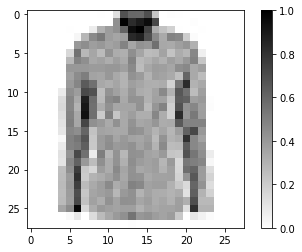

In [0]:
for image,label in test_dataset.take(1):
  break
  
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

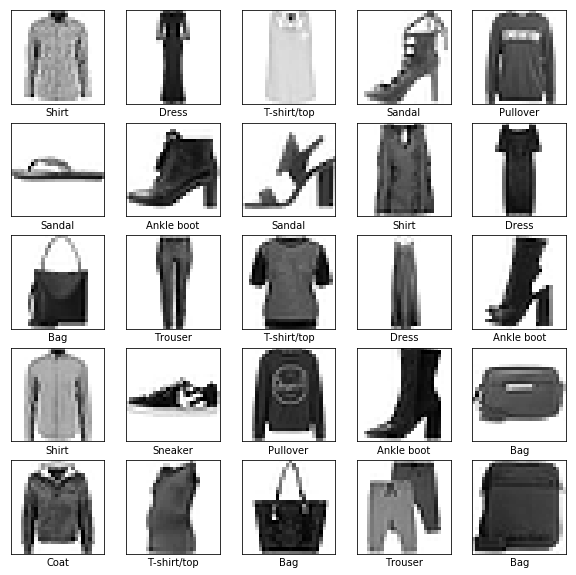

In [0]:
plt.figure(figsize = (10,10))
i = 0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
  
plt.show()
  

Time to build the model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Time to train the model

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4940 - acc: 0.8262
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3701 - acc: 0.8660
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3361 - acc: 0.8775
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3087 - acc: 0.8879
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2937 - acc: 0.8919


In [0]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test_dataset :', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3536 - acc: 0.8755
Accuracy on test_dataset : 0.8755


Time to make predictions

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
predictions.shape

(32, 10)

In [0]:
predictions[0]

array([2.3012788e-05, 2.3438670e-07, 1.0979741e-02, 2.1076687e-04,
       5.5866707e-02, 1.0731127e-07, 9.3290377e-01, 1.3465691e-09,
       1.5635740e-05, 1.2239511e-08], dtype=float32)

In [0]:
np.argmax(predictions[0])

6

In [0]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

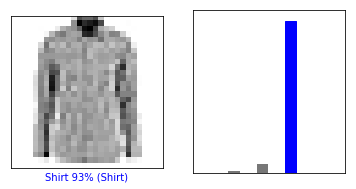

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

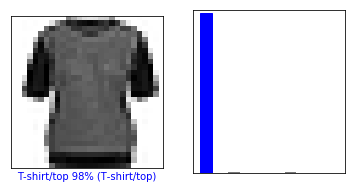

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

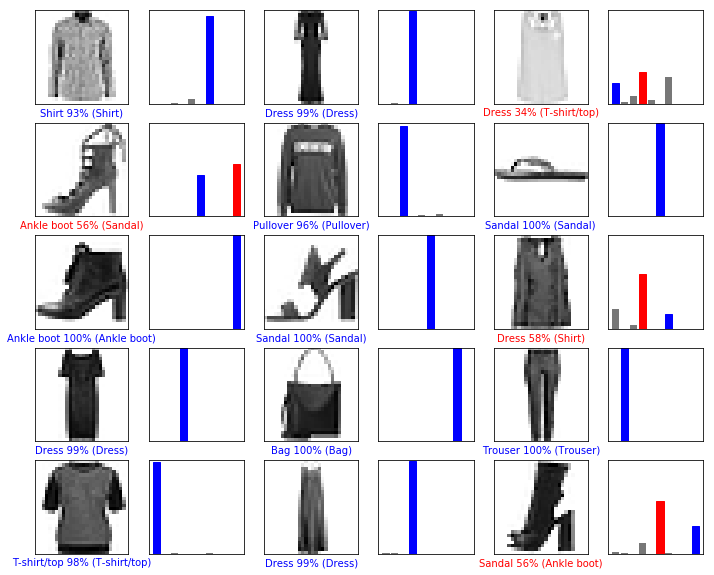

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [0]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [0]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.30127662e-05 2.34386249e-07 1.09797409e-02 2.10767059e-04
  5.58667630e-02 1.07311074e-07 9.32903767e-01 1.34656908e-09
  1.56357673e-05 1.22394876e-08]]


In [0]:
print(np.argmax(predictions_single))

6


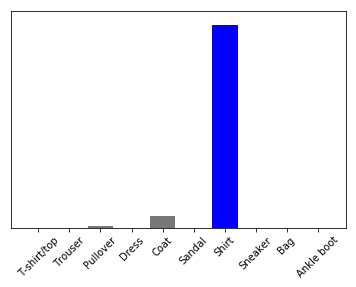

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
image7 = test_images[7]

image7 = np.array([image7])

print(image7.shape)

(1, 28, 28, 1)


In [0]:
test_labels[7]

5

In [0]:
model.predict(image7)

array([[1.7435322e-09, 4.7631370e-09, 6.0208449e-10, 1.3848359e-09,
        1.1160969e-09, 9.9925059e-01, 7.0284289e-10, 1.1494828e-05,
        1.7157812e-09, 7.3781435e-04]], dtype=float32)

In [0]:
predictions_seven = model.predict(image7)

print(np.argmax(predictions_seven))

5
